# import library and csv file

In [2]:
import pandas as pd
wf=pd.read_csv('weather_2020-11.csv')
wf.head()

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3


In [3]:
wf.describe()

,Time,ParameterName,ParameterValue
count,8364,8364,6229
unique,697,12,807
top,2020-11-01T00:00:00Z,TA_PT1H_AVG,3.0
freq,12,697,90


In [5]:
wf.isnull()

,Time,ParameterName,ParameterValue
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
8359,False,False,False
8360,False,False,True
8361,False,False,True
8362,False,False,False


# check for null values

In [6]:
wf.isnull().sum()

Time                 0
ParameterName        0
ParameterValue    2135
dtype: int64

# replace null and non-numeric values

In [28]:
wf['ParameterValue'] = pd.to_numeric(wf['ParameterValue'], errors='coerce')
wf.fillna(0.0, inplace=True)
wf.to_csv('new.csv', index=False)  

In [24]:
wf.isnull().sum()

Time              0
ParameterName     0
ParameterValue    0
dtype: int64

# Calculate average 

In [47]:
wf.groupby('ParameterName')['ParameterValue'].mean()

ParameterName
PA_PT1H_AVG       1012.634146
PRA_PT1H_ACC         0.000000
PRI_PT1H_MAX         0.000000
RH_PT1H_AVG         81.847920
TA_PT1H_AVG          2.740029
TA_PT1H_MAX          2.999857
TA_PT1H_MIN          2.464275
WAWA_PT1H_RANK       0.000000
WD_PT1H_AVG        208.793400
WS_PT1H_AVG          3.900717
WS_PT1H_MAX          4.596844
WS_PT1H_MIN          3.260976
Name: ParameterValue, dtype: float64

# For each parameter, calculate the min, max, and avg values.

In [44]:
import numpy as np
group = wf.groupby('ParameterName')
min_values = {}
max_values = {}
median_values = {}
for i, group_data in group:
    ParameterValue = group_data['ParameterValue']
    min_values[i] = np.min(ParameterValue)
    max_values[i] = np.max(ParameterValue)
    median_values[i] = np.median(ParameterValue)

print("Minimum values")
print(min_values)
print("\nMaximum values")
print(max_values)
print("\nMedian values ")
print(median_values)

Minimum values
{'PA_PT1H_AVG': 977.3, 'PRA_PT1H_ACC': 0.0, 'PRI_PT1H_MAX': 0.0, 'RH_PT1H_AVG': 0.0, 'TA_PT1H_AVG': -8.4, 'TA_PT1H_MAX': -7.8, 'TA_PT1H_MIN': -9.1, 'WAWA_PT1H_RANK': 0.0, 'WD_PT1H_AVG': 4.0, 'WS_PT1H_AVG': 0.4, 'WS_PT1H_MAX': 0.7, 'WS_PT1H_MIN': 0.1}

Maximum values
{'PA_PT1H_AVG': 1032.6, 'PRA_PT1H_ACC': 0.0, 'PRI_PT1H_MAX': 0.0, 'RH_PT1H_AVG': 100.0, 'TA_PT1H_AVG': 10.9, 'TA_PT1H_MAX': 11.1, 'TA_PT1H_MIN': 10.9, 'WAWA_PT1H_RANK': 0.0, 'WD_PT1H_AVG': 359.0, 'WS_PT1H_AVG': 10.3, 'WS_PT1H_MAX': 12.3, 'WS_PT1H_MIN': 9.5}

Median values 
{'PA_PT1H_AVG': 1013.7, 'PRA_PT1H_ACC': 0.0, 'PRI_PT1H_MAX': 0.0, 'RH_PT1H_AVG': 88.0, 'TA_PT1H_AVG': 2.8, 'TA_PT1H_MAX': 3.0, 'TA_PT1H_MIN': 2.5, 'WAWA_PT1H_RANK': 0.0, 'WD_PT1H_AVG': 188.0, 'WS_PT1H_AVG': 3.7, 'WS_PT1H_MAX': 4.4, 'WS_PT1H_MIN': 3.1}


# Find the hour with the highest value for each parameter.

In [58]:
wf['Hour'] = pd.to_datetime(wf['Time']).dt.hour
wf.head()
#assign parameters for different parameter
parameters = wf['ParameterName'].unique()

# array to store
maxhour_per_parameter = {}

for i in parameters:

    ParameterName = wf[wf['ParameterName'] == i]
    

    max_value_per_hour = ParameterName.groupby('hour')['ParameterValue'].max()
    
    
    max_hour = max_value_per_hour.idxmax()
    
    # Store the result in the array
    maxhour_per_parameter[i] = max_hour

# Print or display the results
print("Hour with the highest value for each parameter:")
print(maxhour_per_parameter)


Hour with the highest value for each parameter:
{'TA_PT1H_AVG': 6, 'TA_PT1H_MAX': 6, 'TA_PT1H_MIN': 6, 'RH_PT1H_AVG': 0, 'WS_PT1H_AVG': 12, 'WS_PT1H_MAX': 14, 'WS_PT1H_MIN': 12, 'WD_PT1H_AVG': 10, 'PRA_PT1H_ACC': 0, 'PRI_PT1H_MAX': 0, 'PA_PT1H_AVG': 18, 'WAWA_PT1H_RANK': 0}


# plot

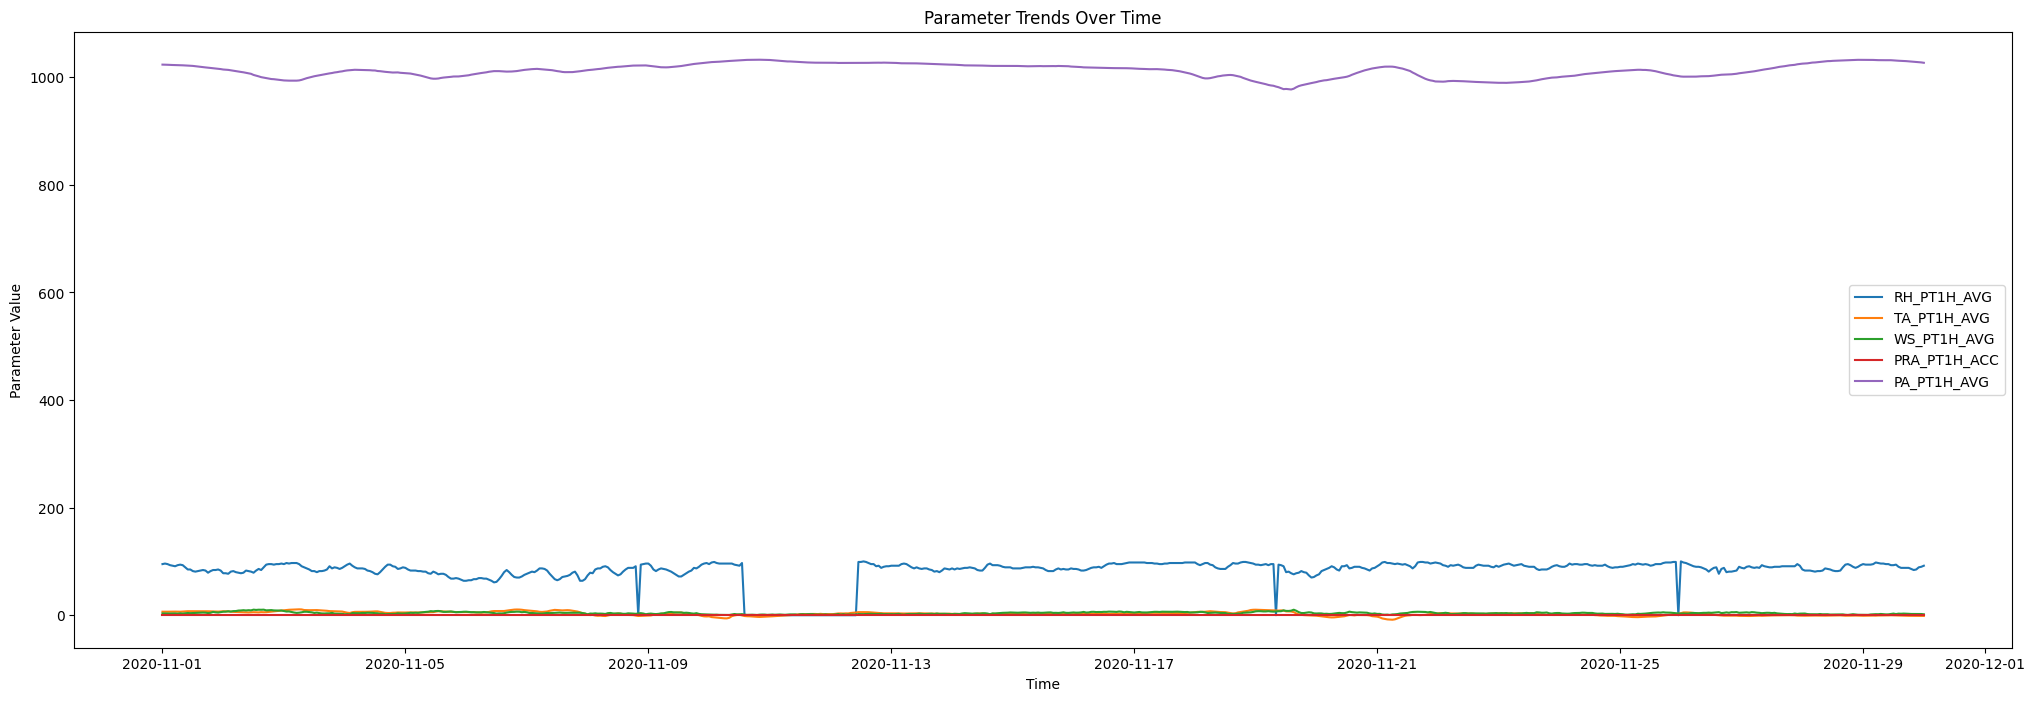

In [74]:
import matplotlib.pyplot as plt
wf['Time'] = pd.to_datetime(wf['Time']) 

ParameterName = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']

parameter = {}
for i in parameters:
    parameter[i] = wf[wf['ParameterName'] == i]


plt.figure(figsize=(25, 8))
for i, j in parameter.items():
    plt.plot(j['Time'], j['ParameterValue'], label=i)

plt.xlabel('Time')
plt.ylabel('Parameter Value')
plt.title('Parameter Trends Over Time')
plt.legend()
plt.show()